In [817]:
import pandas as pd
import numpy as np
np.seterr(divide = 'ignore') 
from simulations import blocks, sigmoid
from scipy.stats import norm
from numpy.random import poisson, lognormal, normal, randint, shuffle
from skbio.stats.composition import closure, clr
#plotting
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
#import matplotlib.gridspec as gridspec
#from matplotlib import ticker
#import matplotlib.colors as mcolors
paper_rc = {'lines.linewidth': 1.5}                  
sns.set_context("paper", rc = paper_rc)  
plt.rcParams["axes.labelsize"] = 16
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['axes.linewidth'] = 1
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

%matplotlib inline

# Examples of simulations


## Whole community based changes (large successions/recruitments)

In [643]:
def plot_slices(tblock,title_,size):

    fig,axn = plt.subplots(1, len(tblock), figsize=size)
    axn=axn.flatten()
    for t_,t_blocks in enumerate(tblock):

        x,y = t_blocks[0],t_blocks[1]
        #shuffle(y)
        im1 = axn[t_].imshow(clr(y+1), aspect='auto',norm=MidpointNormalize(midpoint=0.),
                                interpolation='nearest', cmap='RdBu_r')
        cbar = fig.colorbar(im1, ax=axn[t_])
        axn[t_].set_xticks([])
        axn[t_].set_yticks([])
        if t_==0:
            axn[t_].set_ylabel('Microbial Features')
        axn[t_].set_xlabel('Samples')
        axn[t_].set_title('time: '+str(t_),fontsize=18)
        
        plt.suptitle(title_, fontsize=22, y=1.1)
        
    return fig


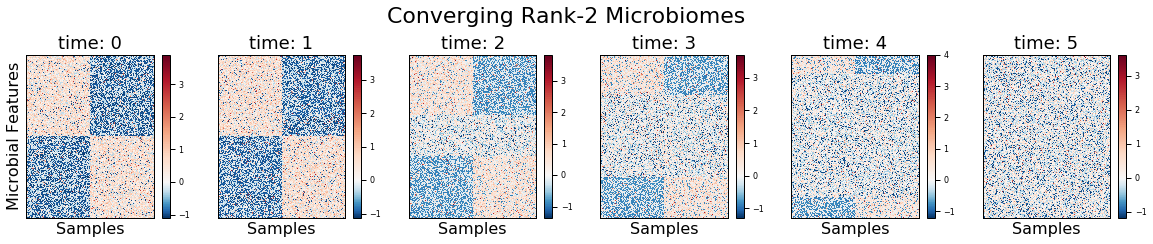

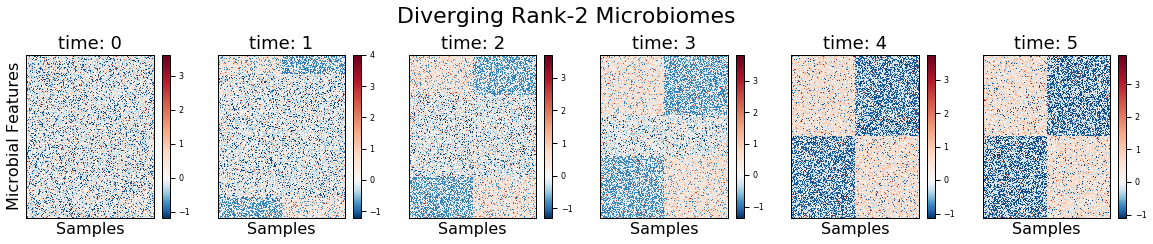

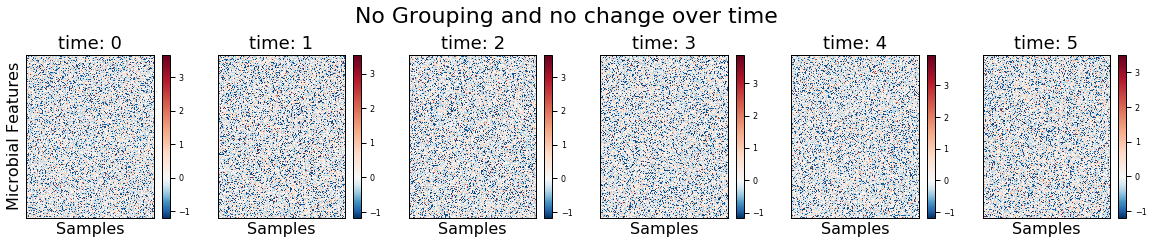

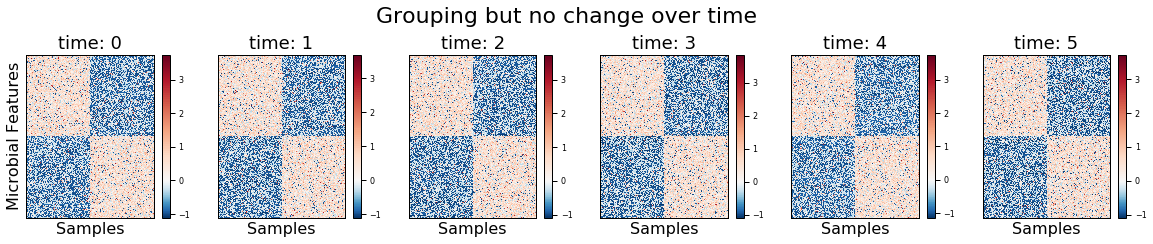

In [644]:
timemax = 500
timestep = 5
time = [0]+list(np.linspace(0,timemax,timestep))
tblock = [blocks(1000,200,depth=2500,sig_noise=0.5,
                 feature_offset=int(t_)) for t_ in time]
tblock_no_group = [blocks(1000,200,depth=2500,sig_noise=0.5,n_blocks=1) 
                   for t_ in time]
tblock_no_chnage = [blocks(1000,200,depth=2500,sig_noise=0.5,n_blocks=2) 
                    for t_ in time]
size = (20, 3)
fig1 = plot_slices(tblock,'Converging Rank-2 Microbiomes',size)
fig2 = plot_slices(tblock[::-1],'Diverging Rank-2 Microbiomes',size)
fig3 = plot_slices(tblock_no_group,'No Grouping and no change over time',size)
fig4 = plot_slices(tblock_no_chnage,'Grouping but no change over time',size)
plt.show()



## Non-linear community dynamics (sigmoid, oscillatory)


In [645]:
from simulations import core_noise,cos_stable,sin_decay,\
                        sigmoid,biphasic_sigmoid,impulse
from simulations import temporal_sim


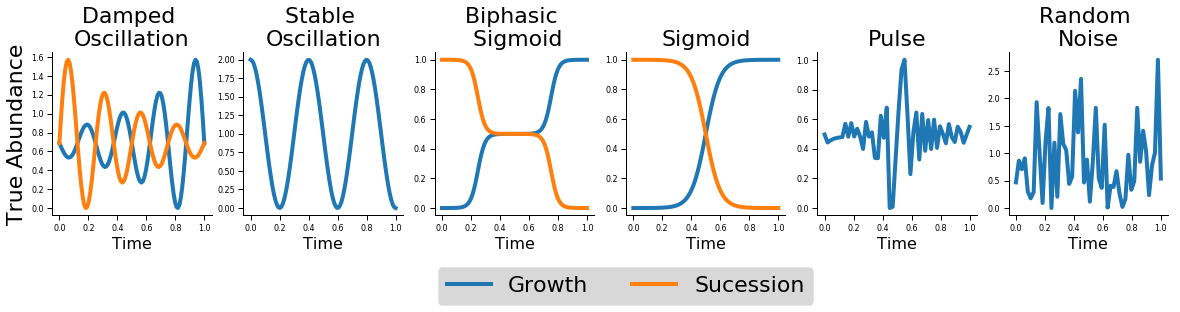

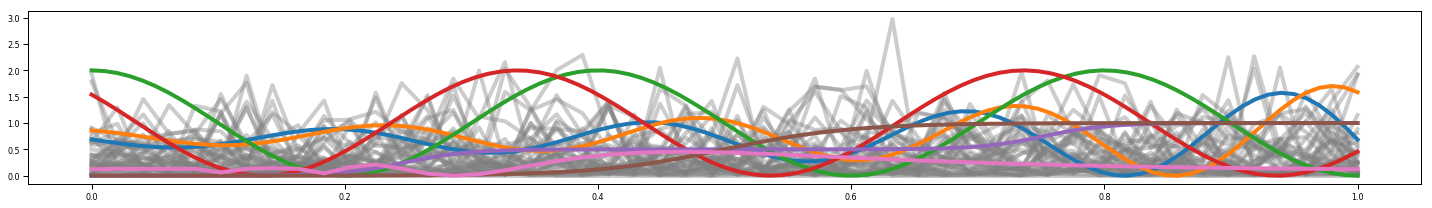

In [815]:

# typles of non-linear signals used  
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6,figsize=(20,3))

ax1.plot(np.linspace(0,1,100),sin_decay(np.linspace(0,1,100)),lw=4)
ax1.plot(np.linspace(0,1,100),sin_decay(np.linspace(0,1,100))[::-1],lw=4)
ax1.set_title('Damped \nOscillation',fontsize=22)
ax1.set_ylabel('True Abundance',fontsize=22)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel('Time',fontsize=16)

ax2.plot(np.linspace(0,1,100),cos_stable(np.linspace(0,1,100)),lw=4)
#ax2.plot(np.linspace(0,1,100),cos_stable(np.linspace(0,1,100))[::-1],lw=4)
ax2.set_title('Stable \nOscillation',fontsize=22)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_xlabel('Time',fontsize=16)

ax3.plot(np.linspace(0,1,100),biphasic_sigmoid(np.linspace(-10,10,50)),lw=4)
ax3.plot(np.linspace(0,1,100),biphasic_sigmoid(np.linspace(-10,10,50))[::-1],lw=4)
ax3.set_title('Biphasic \n Sigmoid',fontsize=22)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_xlabel('Time',fontsize=16)

ax4.plot(np.linspace(0,1,100),sigmoid(np.linspace(-10,10,100)),lw=4,label='Growth')
ax4.plot(np.linspace(0,1,100),sigmoid(np.linspace(-10,10,100))[::-1],lw=4,label='Sucession')
ax4.set_title('Sigmoid',fontsize=22)
ax4.legend(loc=2, bbox_to_anchor=(-1.25, -0.25),
           prop={'size':22},fancybox=True, 
           framealpha=0.3,ncol=2,
           markerscale=5, facecolor="grey")
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.set_xlabel('Time',fontsize=16)

ax5.plot(np.linspace(0,1,50),impulse(np.linspace(0,1,50)),lw=4)
ax5.set_title('Pulse',fontsize=22)
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.set_xlabel('Time',fontsize=16)

ax6.plot(np.linspace(0,1,50),core_noise(np.linspace(0,1,50)),lw=4)
#ax6.plot(np.linspace(0,1,50),[1.0]*len(np.linspace(0,1,50)),lw=4)
ax6.set_title('Random \nNoise',fontsize=22)
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.set_xlabel('Time',fontsize=16)

#plt.suptitle('Non-Linear Signal Types',y=1.25,fontsize=22)
#plt.tight_layout()
plt.savefig('figures/sig_types.png',dpi=300, 
            bbox_inches='tight', transparent=True)
plt.show()

fig,(ax1) = plt.subplots(1,1,figsize=(20,3))
for i in range(40):
    ax1.plot(np.linspace(0,1,50),core_noise(np.linspace(0,1,50))*(i/40),lw=4,c='grey',alpha=.4)
for phase_ in range(2):
    ax1.plot(np.linspace(0,1,100),sin_decay(np.linspace(0,1,100),phase=phase_),lw=4)
for phase_ in range(2):
    ax1.plot(np.linspace(0,1,100),cos_stable(np.linspace(0,1,100),phase=phase_),lw=4)
ax1.plot(np.linspace(0,1,100),biphasic_sigmoid(np.linspace(-10,10,50)),lw=4)
ax1.plot(np.linspace(0,1,100),sigmoid(np.linspace(-10,10,100)),lw=4)
ax1.plot(np.linspace(0,1,50),impulse(np.linspace(0,25,50)),lw=4)
#ax1.set_title('Benchmark on Combined Signals + Noise',fontsize=22)
plt.tight_layout()
plt.savefig('figures/combine_sigs.png',dpi=300, 
            bbox_inches='tight', transparent=True)
plt.show()


# Benchmarking Results


## Block study discriminatory power and time (against flattening)

- Sample Ordination Benchmarking 
    - Weighted and Unweighted UniFrac, RPCA (deicode), BrayCurtis, Jaccard
    - perform sim. over signal-noise ratio and rank
    - Compare tensor ordination PERMANOVA/KNN vs. last timeslice other methods. 

## Ability to extract diff. signals from noisy dataset 

- Signal perturbation in noise simulations 
    - SNR compare w/ and w/o clr ability to identify signal
        - oscillations
            - stable to unstable 
            - stable oscillations out of phase 
        - sigmoid and biphasic sigmoid
            - out of phase
            - growth and decay out of phase
    - impulse response
        - detect inflection point of induction 
        

### signal extraction accuracy 

In [647]:
sig_res = pd.read_csv('signal_bench_res.tsv',sep='\t')
# reformat for plotting
reform_plot = []
for k,df in sig_res.groupby('Fold'):
    df = pd.DataFrame(df.drop(['Fold'],axis=1).set_index('SNR').stack()).reset_index()
    df['Fold'] = k
    df.rename(columns={'level_1': 'persig', 0: 'Rsq'}, inplace=True)
    df['Preprocessing'] = [x.split('-')[0] for x in df.persig]
    df['Signal Type'] = [x.split('-')[1] for x in df.persig]
    df['Preprocessing'] = ['Counts' if x=='Raw Counts' else 'CLR' for x in df.Preprocessing]
    reform_plot.append(df)
reform_plot = pd.concat(reform_plot,axis=0)
reform_plot.head(5)


,SNR,persig,Rsq,Fold,Preprocessing,Signal Type
0,0.0,CLR-Biphasic Sigmoid Growth,0.008772,1,CLR,Biphasic Sigmoid Growth
1,0.0,CLR-Biphasic Sigmoid Sucession,0.020772,1,CLR,Biphasic Sigmoid Sucession
2,0.0,CLR-Impulse,0.000198,1,CLR,Impulse
3,0.0,CLR-Sigmoid Growth,0.018578,1,CLR,Sigmoid Growth
4,0.0,CLR-Sigmoid Sucession,0.004577,1,CLR,Sigmoid Sucession


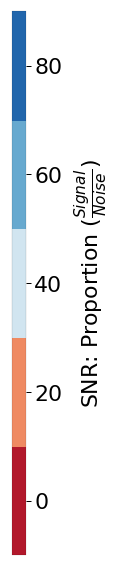

In [898]:
plt.rcParams["axes.labelsize"] = 33
plt.rcParams['xtick.labelsize'] = 33
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['axes.linewidth'] = 0.1

fig,ax =plt.subplots(figsize=(.25,10))
#ax=fig.add_subplot(111)
vals=[0,20,40,60,80,90]
cmap = mpl.colors.ListedColormap(['#b2182b','#ef8a62','#d1e5f0','#67a9cf','#2166ac'])
norm = mpl.colors.BoundaryNorm(vals, cmap.N)
cb = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                spacing='uniform',
                                orientation='vertical',
                                extend='neither',
                                ticks=vals[:-1])
cb.set_label('SNR: Proportion ($\\frac{Signal}{Noise}$)',
             fontsize=22,labelpad=10.2)

tick_locs = (np.array(vals[:-1]) + 10)
tick_locs[-1]-=5
cb.set_ticks(tick_locs)
cb.set_ticklabels(vals[:-1])
plt.savefig('figures/SNR_sigbench_bar.png',dpi=300, 
            bbox_inches='tight', transparent=True)
plt.show()


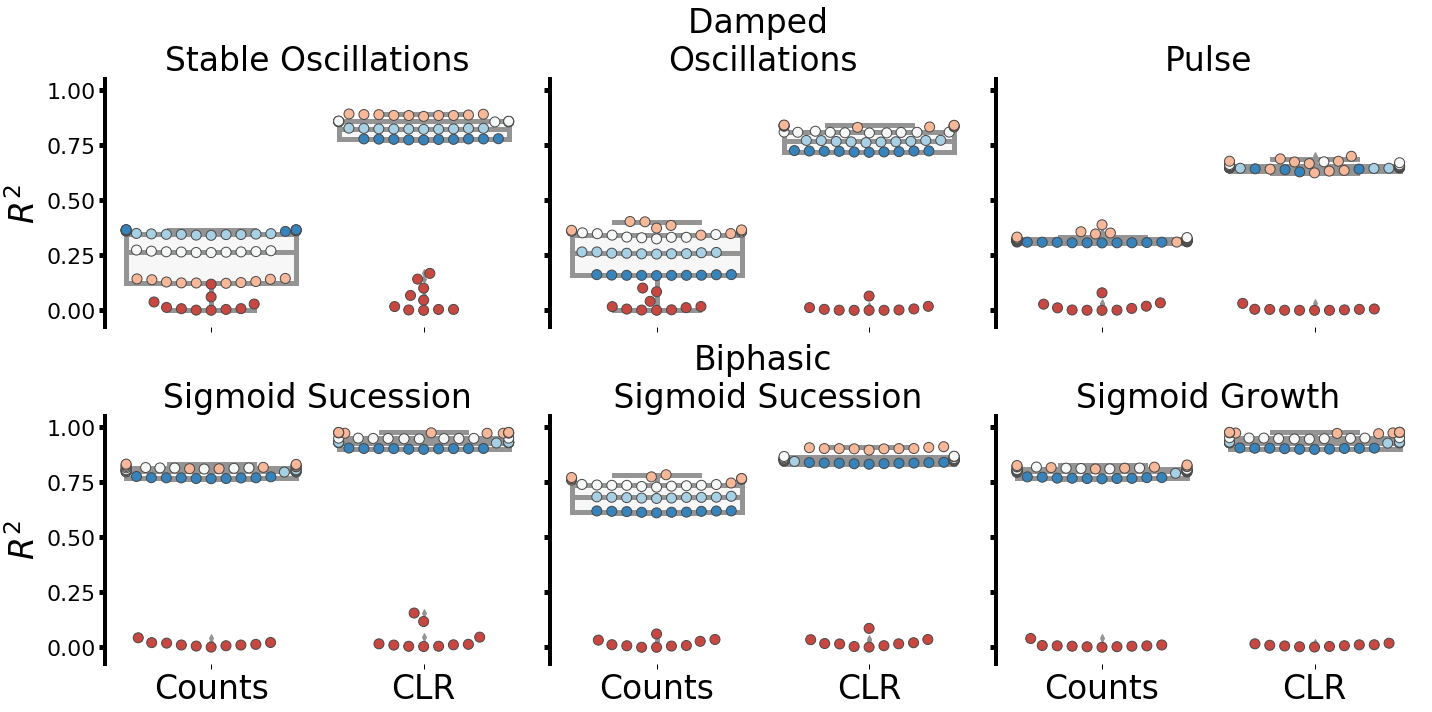

In [895]:
plt.rcParams["axes.labelsize"] = 33
plt.rcParams['xtick.labelsize'] = 33
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['axes.linewidth'] = 4

title_map = {'Biphasic Sigmoid Sucession':'Biphasic\n Sigmoid Sucession',
             'Impulse':'Pulse',
             'Sigmoid Growth':'Sigmoid Growth',
             'Sigmoid Sucession':'Sigmoid Sucession',
             'Stable Oscillations':'Stable Oscillations',
             'Underdamped Oscillations':'Damped \nOscillations'}

fig,axn = plt.subplots(2,3,figsize=(20,10),sharey=True,sharex=True)

plot_ = {k:df for k,df in reform_plot.groupby('Signal Type')}
order_ = ['Stable Oscillations','Underdamped Oscillations',
          'Impulse','Sigmoid Sucession',
          'Biphasic Sigmoid Sucession','Sigmoid Growth']

for key_,(i,axi) in zip(order_,enumerate(axn.flatten())):
    df_plot = plot_[key_]
    sns.swarmplot(x='Preprocessing',y='Rsq',hue='SNR',
                data=df_plot.sort_values('Preprocessing',ascending=False), 
                  palette='RdBu',linewidth=1,size=10,ax=axi)
    sns.boxplot(x='Preprocessing',y='Rsq',
                data=df_plot.sort_values('Preprocessing',ascending=False), 
                palette=['#f7f7f7','#f7f7f7'],linewidth=5,ax=axi)

    axi.legend_.remove()
    
    #axi.set_title('\n'.join(key_.split(' ')),fontsize=30,y=1.1)
    axi.set_title(title_map[key_],fontsize=33,y=1.01)
    if i in [0,3]:
        axi.set_ylabel('$R^{2}$')
    else:
        axi.set_ylabel('')
    axi.set_xlabel('')
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.spines['bottom'].set_visible(False)
    axi.tick_params(axis='y',width=5,length=6)

plt.tight_layout()
plt.savefig('figures/SNR_sigbench_no_legend.png',dpi=300, 
            bbox_inches='tight', transparent=True)
plt.show()


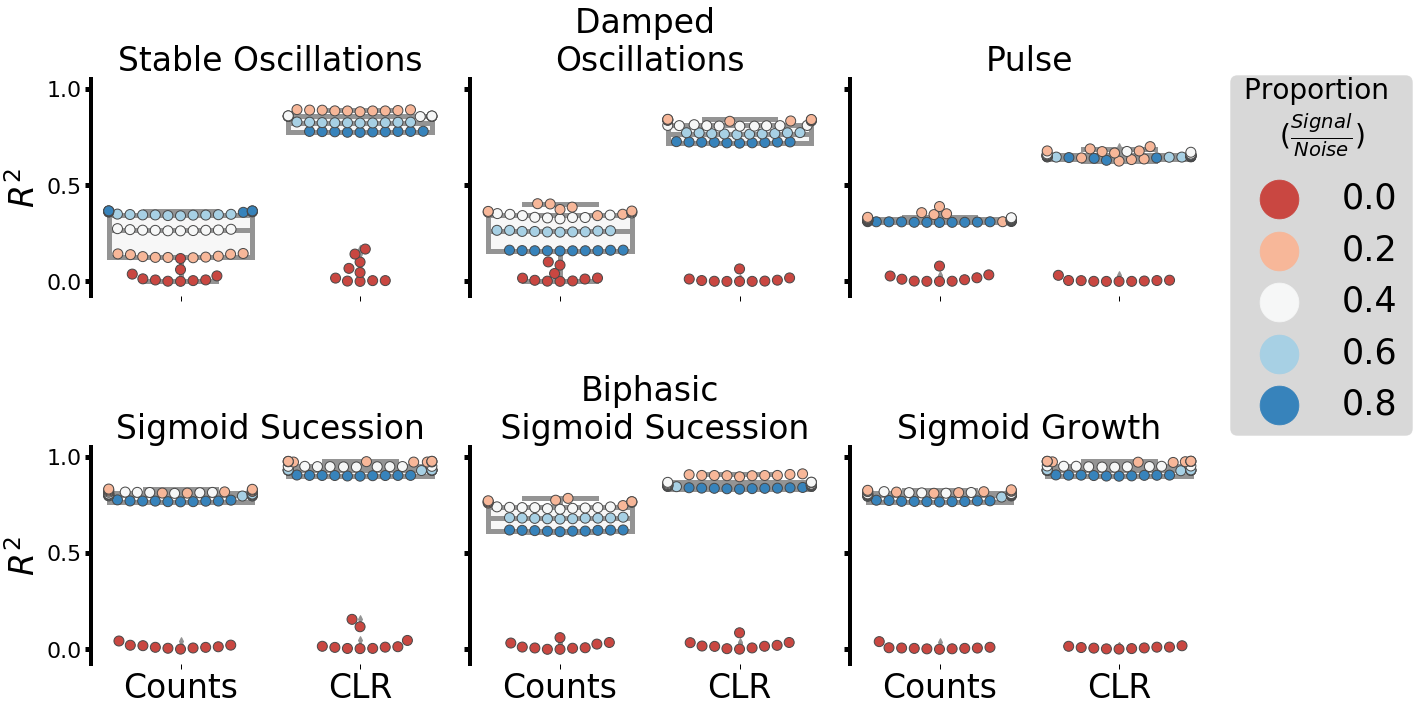

In [648]:
plt.rcParams["axes.labelsize"] = 33
plt.rcParams['xtick.labelsize'] = 33
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['axes.linewidth'] = 4

title_map = {'Biphasic Sigmoid Sucession':'Biphasic\n Sigmoid Sucession',
             'Impulse':'Pulse',
             'Sigmoid Growth':'Sigmoid Growth',
             'Sigmoid Sucession':'Sigmoid Sucession',
             'Stable Oscillations':'Stable Oscillations',
             'Underdamped Oscillations':'Damped \nOscillations'}

fig,axn = plt.subplots(2,3,figsize=(20,10),sharey=True,sharex=True)

plot_ = {k:df for k,df in reform_plot.groupby('Signal Type')}
order_ = ['Stable Oscillations','Underdamped Oscillations',
          'Impulse','Sigmoid Sucession',
          'Biphasic Sigmoid Sucession','Sigmoid Growth']

for key_,(i,axi) in zip(order_,enumerate(axn.flatten())):
    df_plot = plot_[key_]
    sns.swarmplot(x='Preprocessing',y='Rsq',hue='SNR',
                data=df_plot.sort_values('Preprocessing',ascending=False), 
                  palette='RdBu',linewidth=1,size=10,ax=axi)
    sns.boxplot(x='Preprocessing',y='Rsq',
                data=df_plot.sort_values('Preprocessing',ascending=False), 
                palette=['#f7f7f7','#f7f7f7'],linewidth=5,ax=axi)
    
    if i==2:
        leg = axi.legend(loc=2, bbox_to_anchor=(1.01, 1.1),
           prop={'size':35},fancybox=True, 
           framealpha=0.3,ncol=1, 
           title='Proportion \n    ($\\frac{Signal}{Noise}$)',
           markerscale=5, facecolor="grey")
        leg.get_title().set_fontsize('28')
    else:
        axi.legend_.remove()
    
    #axi.set_title('\n'.join(key_.split(' ')),fontsize=30,y=1.1)
    axi.set_title(title_map[key_],fontsize=33,y=1.01)
    if i in [0,3]:
        axi.set_ylabel('$R^{2}$')
    else:
        axi.set_ylabel('')
    axi.set_xlabel('')
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.spines['bottom'].set_visible(False)
    axi.tick_params(axis='y',width=5,length=6)

plt.tight_layout()
plt.savefig('figures/SNR_sigbench_w_legend.png',dpi=300, 
            bbox_inches='tight', transparent=True)
plt.show()


### perturbation detection

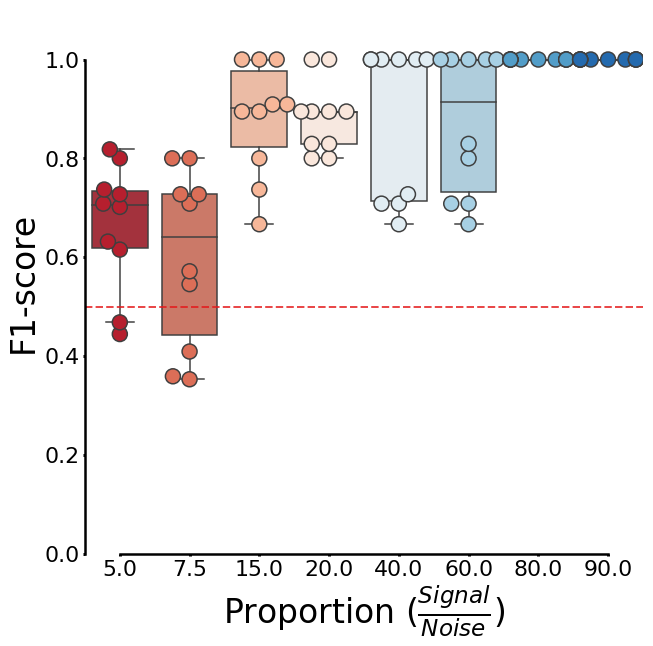

In [649]:
plt.rcParams["axes.labelsize"] = 33
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['axes.linewidth'] = 2.5

fig,axn = plt.subplots(1,1,figsize=(10,10))

pet_res = pd.read_csv('pertubation_bench_res.tsv',sep='\t')
pet_res['SNR'] *= 100
pet_res['SNR'] = np.around(pet_res['SNR'],1)
#axn = sns.pointplot(y='Accuracy',x='SNR'
#                  ,palette='RdBu',scale=1.5,
#                    errwidth=4,data=pet_res)
axn = sns.boxplot(y='Accuracy',x='SNR'
                  ,palette='RdBu',data=pet_res)
axn = sns.swarmplot(y='Accuracy',x='SNR',hue='SNR',
                    palette='RdBu',
                    linewidth=1.5,size=15,data=pet_res)
axn.legend_.remove()
axn.set_ylabel('F1-score')
axn.set_xlabel('Proportion ($\\frac{Signal}{Noise}$)')
axn.set_ylim([0,1.1])
axn.spines['right'].set_visible(False)
axn.spines['top'].set_visible(False)
axn.spines['left'].set_bounds(0, 1)
axn.spines['bottom'].set_bounds(0, 7)
axn.tick_params(axis='both',width=3,length=2)
# guessing
axn.axhline(.5,c='#e41a1c',alpha=.8,ls='--',lw=2)
plt.savefig('figures/pert_dect_f1.png',dpi=300, 
            bbox_inches='tight', transparent=True)
plt.show()


In [652]:

pt = 90
time = np.linspace(0,3,100)
timeimp = np.linspace(0,1,100)
pt=pt//2
imptimeb4 = timeimp[:40]
imptimea4 = timeimp[40:]
timeb4 = time[:pt]
timea4 = time[pt:]
time_p = np.interp(time, (time.min(), 
                          time.max()), 
                   (0, 100))
# signals used in simulation
s1 = cos_stable(time)/4 + 1
s2 = np.array([0.4]*len(imptimeb4)+list(impulse(imptimea4)))
s3 = np.array([0]*len(timeb4)+list(sigmoid(np.interp(timea4, (timea4.min(), 
                                                              timea4.max()), 
                                                     (-5, +5)))))*2
s4 = np.array([.99]*len(timeb4)+list(sigmoid(np.interp(timea4, (timea4.min(), 
                                                                timea4.max()), 
                                                       (-5, +5))))[::-1])*2


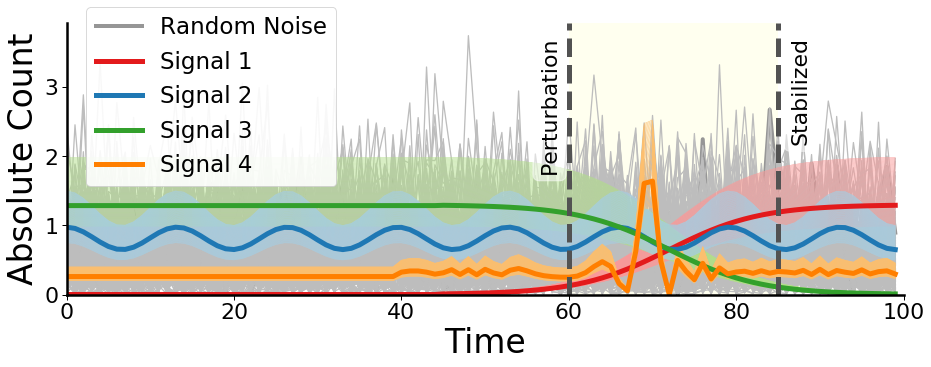

In [659]:
# set SNR
sig_ = .6
noise = 1-sig_
sig_nr = np.around(sig_/4,2)
nf = 500

fig,axn = plt.subplots(1,1,figsize=(15,5))


# noise
axn.plot(core_noise(time)*i,c='#969696',
         lw=4,label='Random Noise')
for i in np.linspace(.5,1,int(nf*noise)):
    axn.plot(core_noise(time)*i,c='#bdbdbd',lw=1.3)
# std lines
for i in np.linspace(.5,1,int(nf*sig_nr)):
    axn.plot(s3*i,lw=.5,c='#fb9a99')
for i in np.linspace(.5,1,int(nf*sig_nr)):
    axn.plot(s4*i,lw=.5,c='#b2df8a')
for i in np.linspace(.5,1,int(nf*sig_nr)):
    axn.plot(s1*i,lw=.5,c='#a6cee3')
for i in np.linspace(.5,1,int(nf*sig_nr)):
    axn.plot(s2*i,lw=.5,c='#fdbf6f')
# mean lines
axn.plot(s3*.65,lw=5,c='#e31a1c',label='Signal 1')
axn.plot(s1*.65,lw=5,c='#1f78b4',label='Signal 2')
axn.plot(s4*.65,lw=5,c='#33a02c',label='Signal 3')
axn.plot(s2*.65,lw=5,c='#ff7f00',label='Signal 4')


axn.set_ylim(0,)
axn.set_xlim(0,100)
axn.spines['right'].set_visible(False)
axn.spines['top'].set_visible(False)
axn.set_ylabel('Absolute Count')
axn.set_xlabel('Time')
axn.axvspan(60, 85, facecolor='#ffffcc', alpha=0.3)
# labels
props = dict(boxstyle='round', facecolor='white', 
             alpha=0.5, edgecolor='white',linewidth=1)
axn.axvline(60,lw=5,ls='--',c='#525252')
axn.text(56.5,3.5,'Perturbation',rotation=90,fontsize=22,bbox=props)
axn.axvline(85,lw=5,ls='--',c='#525252')
axn.text(86.5,3.5,'Stabilized',rotation=90,fontsize=22,bbox=props)
axn.legend(loc=2, bbox_to_anchor=(.01, 1.1),
           prop={'size':23},fancybox=True, 
           framealpha=0.9,ncol=1,
           markerscale=5, facecolor="white")
plt.savefig('figures/in_signal.png',dpi=300, 
            bbox_inches='tight', transparent=True)
plt.show()


In [805]:
from scipy.signal import butter,filtfilt

## get loadings ##
loadings_df = pd.read_csv('pertubation_detection/fold_4_SNR_0.6_time_loadings.tsv',
                        header=None,sep='\t')
s1 = loadings_df[0].values # pulse
s2 = loadings_df[1].values # spikes
s3 = loadings_df[2].values # decrease
s4 = loadings_df[3].values # increase
s5 = loadings_df[4].values # osc.

## butterworth filter ## 

# sigmoid growth (sig 1) 
b, a = butter(1, .1, 'low')
s1_plot = filtfilt(b, a, s4)
s1_plot = list(s1_plot[12:])+list(s1_plot[:12]+.1)

# oscilation (sig 2)
b, a = butter(1, (.1,.2), 'band')
s2_plot = filtfilt(b, a, s5)*-1

# sigmoid decay (sig 3)
b, a = butter(1, .09, 'low')
s3_plot = filtfilt(b, a, s3)
s3_plot = list(s3_plot[12:])+list([s3_plot[-1]]*len(s3_plot[:12]))

# impulse (sig 4)
b, a = butter(1, (.5,.80), 'band')
s4_plot = filtfilt(b, a, s1)
s4_plot = list(s4_plot[10:])+list(s4_plot[:10])


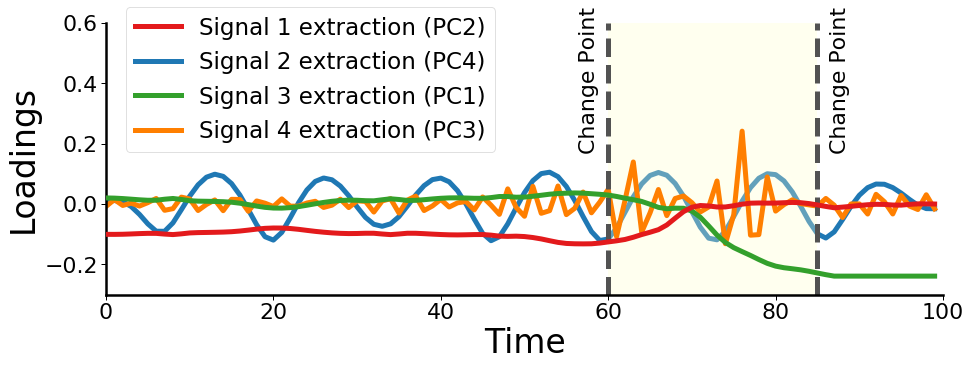

In [811]:
fig,axn = plt.subplots(1,1,figsize=(15,5))

# mean lines
axn.plot(s1_plot,lw=5,c='#e31a1c',label='Signal 1 extraction (PC2)',zorder=4)
axn.plot(s2_plot,lw=5,c='#1f78b4',label='Signal 2 extraction (PC4)',zorder=0)
axn.plot(s3_plot,lw=5,c='#33a02c',label='Signal 3 extraction (PC1)',zorder=3)
axn.plot(s4_plot,lw=5,c='#ff7f00',label='Signal 4 extraction (PC3)',zorder=2)
# perams
axn.set_ylim(-.3,.6)
axn.set_xlim(0,100)
axn.spines['right'].set_visible(False)
axn.spines['top'].set_visible(False)
axn.set_ylabel('Loadings')
axn.set_xlabel('Time')
axn.axvspan(60, 85, facecolor='#ffffcc', alpha=0.3)
# labels
props = dict(boxstyle='round', facecolor='white', 
             alpha=0.5, edgecolor='white',linewidth=1)
axn.axvline(60,lw=5,ls='--',c='#525252')
axn.text(56.5,0.6,'Change Point',rotation=90,fontsize=22,bbox=props)
axn.axvline(85,lw=5,ls='--',c='#525252')
axn.text(86.5,0.6,'Change Point',rotation=90,fontsize=22,bbox=props)
axn.legend(loc=2, bbox_to_anchor=(.01, 1.1),
           prop={'size':23},fancybox=True, 
           framealpha=0.75,ncol=1,
           markerscale=5, facecolor="white")
plt.savefig('figures/out_signal.png',dpi=300, 
            bbox_inches='tight', transparent=True)
plt.show()
